In [469]:
import cv2
import numpy
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [470]:
path = r"C:\cllg\nural networks\Parkinsons\data"
INPSIZE = (200,200)

In [471]:
x = []
y = []

In [472]:
npath = os.path.join(path,"nm")

for i in tqdm(os.listdir(npath)):
    y.append(0)
    img = cv2.cvtColor(cv2.imread(os.path.join(npath,i)),cv2.COLOR_BGR2GRAY)
#     img = img[round(img.shape[0]*.25):round(img.shape[0]*.65), round(img.shape[1]*.30):round(img.shape[1]*.70)]
    img = cv2.resize(img,INPSIZE)
    x.append(img)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:09<00:00, 21.20it/s]


In [473]:
npath = os.path.join(path,"pd")

for i in tqdm(os.listdir(npath)):
    y.append(1)
    img = cv2.cvtColor(cv2.imread(os.path.join(npath,i)),cv2.COLOR_BGR2GRAY)
#     img = img[round(img.shape[0]*.25):round(img.shape[0]*.65), round(img.shape[1]*.30):round(img.shape[1]*.70)]
    img = cv2.resize(img,INPSIZE)
    x.append(img)

100%|████████████████████████████████████████████████████████████████████████████████| 197/197 [00:09<00:00, 21.00it/s]


In [474]:
x = np.array(x)
y = np.array(y)

In [475]:
x.shape, y.shape

((397, 200, 200), (397,))

In [476]:
p = np.random.permutation(y.shape[0])

In [477]:
x = x[p]
y = y[p]

In [478]:
i = 0

0


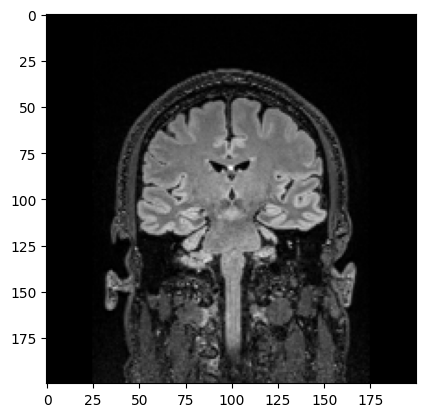

In [479]:
plt.imshow(x[i],cmap="gray")
print(y[i])
i+=1

In [582]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [583]:
BATCH_SIZE = 16

train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=[0.7,1],
    rotation_range=10,
    brightness_range=[.6,1.4],
    fill_mode = "nearest",
    )

In [584]:
model = Sequential([
    Conv2D(8,(3,3), activation = "leaky_relu", input_shape=INPSIZE+(1,)),
    MaxPooling2D(),
    
    Conv2D(32,(3,3), activation = "leaky_relu"),
    MaxPooling2D(),
    
    Conv2D(64,(3,3), activation = "leaky_relu"),
    MaxPooling2D(),
    
    Conv2D(256,(3,3), activation = "leaky_relu"),
    MaxPooling2D(),
    
    Conv2D(512,(3,3), activation = "leaky_relu"),
    MaxPooling2D(),
    
    Flatten(),
    
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 198, 198, 8)       80        
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 99, 99, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 97, 97, 32)        2336      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 23, 23, 64)     

In [585]:
model.compile(optimizer=tf.optimizers.Adam(1e-4), loss=tf.losses.binary_crossentropy, metrics=["acc"])

In [586]:
hist = model.fit(train_generator.flow(np.reshape(x, (x.shape[0], x.shape[1], x.shape[2], 1)), y, batch_size=BATCH_SIZE),
                 steps_per_epoch=len(y) // BATCH_SIZE,
                 epochs=50,
                 validation_data=(train_generator.flow(np.reshape(x, (x.shape[0], x.shape[1], x.shape[2], 1)), y, batch_size=BATCH_SIZE))
                )

Epoch 1/50
24/24 [==============================] - 13s 499ms/step - loss: 0.6936 - acc: 0.4961 - val_loss: 0.6918 - val_acc: 0.6751
Epoch 2/50
24/24 [==============================] - 12s 521ms/step - loss: 0.6911 - acc: 0.5591 - val_loss: 0.6882 - val_acc: 0.5214
Epoch 3/50
24/24 [==============================] - 13s 549ms/step - loss: 0.6900 - acc: 0.5013 - val_loss: 0.6918 - val_acc: 0.5038
Epoch 4/50
24/24 [==============================] - 13s 561ms/step - loss: 0.6904 - acc: 0.5302 - val_loss: 0.6862 - val_acc: 0.5869
Epoch 5/50
24/24 [==============================] - 14s 600ms/step - loss: 0.6847 - acc: 0.5617 - val_loss: 0.6772 - val_acc: 0.6574
Epoch 6/50
24/24 [==============================] - 15s 614ms/step - loss: 0.6762 - acc: 0.6089 - val_loss: 0.6548 - val_acc: 0.7103
Epoch 7/50
24/24 [==============================] - 15s 615ms/step - loss: 0.6551 - acc: 0.6247 - val_loss: 0.6297 - val_acc: 0.7330
Epoch 8/50
24/24 [==============================] - 15s 627ms/step - 

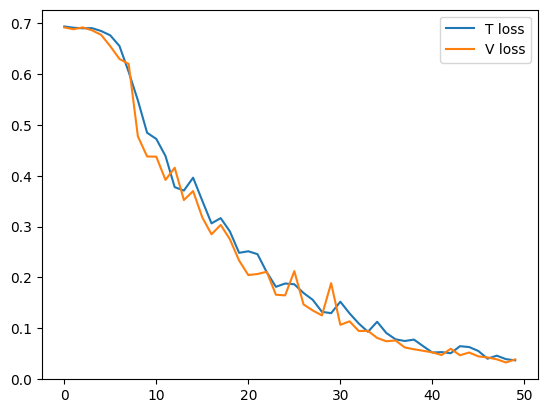

In [587]:
plt.plot(hist.history["loss"], label="T loss")
plt.plot(hist.history["val_loss"], label="V loss")
plt.legend()
plt.show()

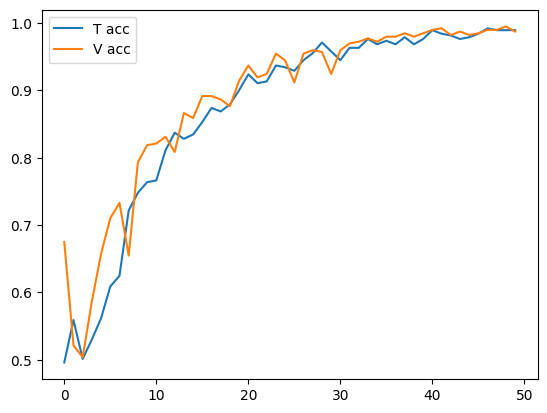

In [588]:
plt.plot(hist.history["acc"], label="T acc")
plt.plot(hist.history["val_acc"], label="V acc")
plt.legend()
plt.show()

In [589]:
i = 0

1/1 [==============================] - 0s 40ms/step
pred: Normal, actual: Normal
Correct


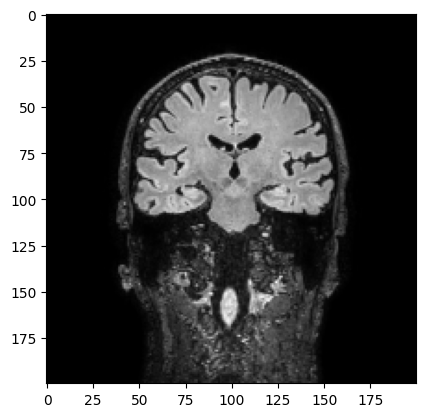

In [609]:
plt.imshow(x[i], cmap="gray")

cl = ["Normal","Parkinsons"]
pred = round(model.predict(np.array([x[i]/255]))[0,0])
print(f"pred: {cl[pred]}, actual: {cl[y[i]]}")

if pred == y[i]:
    print("Correct")
else:
    print("Wrong")

i += 1

In [610]:
# model.save(r"C:\cllg\nural networks\Parkinsons\models\pd_98val.h5")

In [699]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [700]:
pred = model.predict(x).round().T[0]

13/13 [==============================] - 3s 260ms/step


In [703]:
confusion_matrix(y,pred)

array([[193,   7],
       [  3, 194]], dtype=int64)

In [704]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       200
           1       0.97      0.98      0.97       197

    accuracy                           0.97       397
   macro avg       0.97      0.97      0.97       397
weighted avg       0.98      0.97      0.97       397



In [733]:
i = 0

0


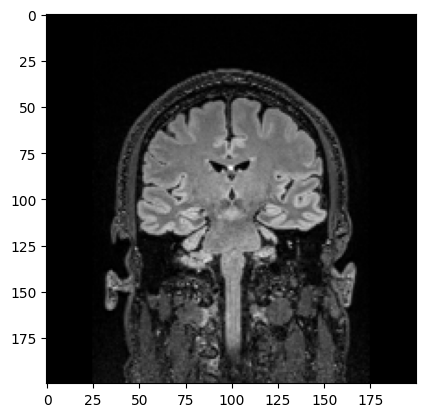

In [734]:
plt.imshow(x[i], cmap="gray")
print(y[i])
i += 1

In [735]:
ad = train_generator.flow(x.reshape(x.shape[0],x.shape[1], x.shape[2], 1),y)

In [736]:
i = 0

1/1 [==============================] - 0s 51ms/step
pred: Parkinsons, actual: Parkinsons
Correct


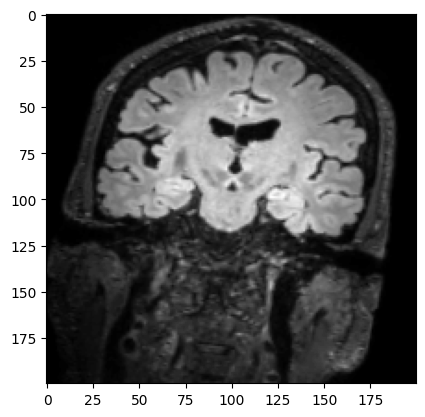

In [758]:
aimg = np.reshape(ad[0][0][i],(x[0].shape))

plt.imshow(aimg, cmap="gray")
pred = round(model.predict(np.array([aimg]))[0][0])

print(f"pred: {cl[pred]}, actual: {cl[ad[0][1][i]]}")

if pred == ad[0][1][i]:
    print("Correct")
else:
    print("Wrong")

i += 1